In [3]:

import pandas as pd
import numpy as np
import sys, os
import re
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from database.connect_db import connect


In [4]:
# Connect database
query = "SELECT * FROM bronze.raw_data"
conn, cur = connect()
df = pd.read_sql_query(query, conn)

Database connected successfully!


C:\Users\Gray\AppData\Local\Temp\ipykernel_4620\3984953757.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


#### Khám phá dữ liệu (EDA)
---

In [5]:
df.columns

Index(['id', 'title', 'address', 'area', 'floors', 'furniture', 'bedrooms',
       'bathrooms', 'price', 'price_m2', 'posted_date', 'link'],
      dtype='object')

**Notes:**
- ``floors:`` Số tầng
- ``furniture:`` nội thất


In [6]:
df.shape

(1029, 12)

Có 2814 sample với 11 columns

In [7]:
# Preview data
df.head()

,id,title,address,area,floors,furniture,bedrooms,bathrooms,price,price_m2,posted_date,link
0,1,Tôi chú Thông cần bán gấp căn nhà Nguyễn Thị M...,"Đường Nguyễn Thị Minh Khai, Phường Đa Kao, Quậ...","40,2 m²",2 tầng,Cơ bản,4 phòng,4 phòng,"3,68 tỷ","~91,54 triệu/m²",03/12/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
1,2,"NHÀ 4 TẦNG 100M ĐẾN VẠN PHÚC CITY - HẺM OTO, D...","Đường Đinh Thị Thi, Phường Hiệp Bình Phước, Th...",50 m²,4 tầng,Cơ bản,4 phòng,3 phòng,"7,5 tỷ",~150 triệu/m²,03/12/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
2,3,BÁN TÒA NHÀ CHDV 40 PHÒNG DOANH THU HIỆN ĐANG ...,"Đường Lê Văn Thọ, Phường 14, Gò Vấp, Hồ Chí Minh",250 m²,6 tầng,Đầy đủ,40 phòng,40 phòng,49 tỷ,~196 triệu/m²,03/12/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
3,4,Cư xá Công An - Đường 8m Bùi Đình Tuý - Bình T...,"Đường Bùi Đình Túy, Phường 12, Bình Thạnh, Hồ ...","54,7 m²",2 tầng,None,None,None,"10,9 tỷ","~199,27 triệu/m²",01/12/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
4,5,Nhà phố 3 lầu HXT 7m đường Nguyễn Trãi Quận 5 ...,"Đường Nguyễn Trãi, Phường 3, Quận 5, Hồ Chí Minh",131 m²,3 tầng,Cơ bản,6 phòng,5 phòng,"24,5 tỷ","~187,02 triệu/m²",02/12/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...


Cột id chỉ là cột đánh dấu số thứ tự trong database nên không cần thiết vì vậy ta sẽ drop nó đi và set index lại giống id.

In [8]:
df.set_index("id",inplace=True)

In [9]:
df.head()

,title,address,area,floors,furniture,bedrooms,bathrooms,price,price_m2,posted_date,link
id,,,,,,,,,,,
1,Tôi chú Thông cần bán gấp căn nhà Nguyễn Thị M...,"Đường Nguyễn Thị Minh Khai, Phường Đa Kao, Quậ...","40,2 m²",2 tầng,Cơ bản,4 phòng,4 phòng,"3,68 tỷ","~91,54 triệu/m²",03/12/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
2,"NHÀ 4 TẦNG 100M ĐẾN VẠN PHÚC CITY - HẺM OTO, D...","Đường Đinh Thị Thi, Phường Hiệp Bình Phước, Th...",50 m²,4 tầng,Cơ bản,4 phòng,3 phòng,"7,5 tỷ",~150 triệu/m²,03/12/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
3,BÁN TÒA NHÀ CHDV 40 PHÒNG DOANH THU HIỆN ĐANG ...,"Đường Lê Văn Thọ, Phường 14, Gò Vấp, Hồ Chí Minh",250 m²,6 tầng,Đầy đủ,40 phòng,40 phòng,49 tỷ,~196 triệu/m²,03/12/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
4,Cư xá Công An - Đường 8m Bùi Đình Tuý - Bình T...,"Đường Bùi Đình Túy, Phường 12, Bình Thạnh, Hồ ...","54,7 m²",2 tầng,None,None,None,"10,9 tỷ","~199,27 triệu/m²",01/12/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
5,Nhà phố 3 lầu HXT 7m đường Nguyễn Trãi Quận 5 ...,"Đường Nguyễn Trãi, Phường 3, Quận 5, Hồ Chí Minh",131 m²,3 tầng,Cơ bản,6 phòng,5 phòng,"24,5 tỷ","~187,02 triệu/m²",02/12/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...


Sau khi set id thành index thì id sẽ không còn là cột trong dataframe nữa

#### Feature Classification (Phân loại đặc trưng)
---
``Mục đích:`` Chọn đúng biểu đồ để trực quan hóa và chọn đúng kỹ thuật tiền xử lý dữ liệu.

1/ Đặc trưng định tính(Categorical Features)

Các đặc trưng định tính(hay còn gọi là biến ohân loại) là những biến mà giá trị của chúng là các nhãn(labels) hoặc danh mục(categories).

``Các loại phổ biến:``
- ``Nominal(Danh nghĩa):`` Các danh mục không có thứ tự hoặc xếp hạng tự nhiên.
    Ví dụ: Màu sắc(Xanh, đỏ, vàng), quốc gia(Việt Nam, Lào)
- ``Ordinal(Thứ tự):`` Các danh mục có thứ tự hoặc xếp hạng tự nhiên.
    Ví dụ: Mức độ hài lòng(Rất tệ, tệ), cấp bậc

2/ Đặc trưng định lượng(Numerical Features)

Các đặc trưng định lượng(hay còn gọi là biến số) là những biến mà giá trị của chúng là các số và có ý nghĩa toán học.

``Các loại phổ biến:``
- ``Discrete(rời rạc):`` Các giá trị là số nguyên, kết quả của việc đếm.
    Ví dụ: Số lượng phòng ngủ, số lần nhấp chuột, số lượng học sinh
- ``Continuous(Liên tục):`` Các giá trị có thể là bất kỳ số nào trong một phạm vi, kết quả của việc đo lường.
    Ví dụ: Diện tích, giá, nhiệt độ, độ cao.
- ``Timeseries(chuỗi thời gian):`` Là một dạng liên tục đặc biệt, được sắp xếp theo trình tự thời gian.
    Ví dụ: Gía cổ phiếu hàng ngày, nhiệt độ trung bình, ngày đăng tin.

``TẠI SAO VIỆC PHÂN LOẠI LẠI QUAN TRỌNG?``

1/ Chọn biểu đồ trực quan hóa (Visualization):
- ``Định lượng:`` Thường dùng Histogram, Box Plot, Scatter Plot.
- ``Định tính:`` Thường dùng Bar Chart(Biểu đồ thanh), Pie Chart.

2/ Xử lý giá trị thiếu(Missing values):
- ``Định lượng:`` Thường thay thế bằng giá trị Trung bình(Mean), hoặc trung vị (Median).
- ``Định tính:`` Thường thay thế bằng Mode(Gía trị xuất hiện nhiều nhất) hoặc một danh mục mới("Unknow")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 1 to 1029
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1029 non-null   object
 1   address      1029 non-null   object
 2   area         1029 non-null   object
 3   floors       864 non-null    object
 4   furniture    576 non-null    object
 5   bedrooms     840 non-null    object
 6   bathrooms    799 non-null    object
 7   price        1029 non-null   object
 8   price_m2     990 non-null    object
 9   posted_date  1029 non-null   object
 10  link         1029 non-null   object
dtypes: object(11)
memory usage: 96.5+ KB


Hiện tại thì các giá trị đều là object vì trong mỗi cột đề có text nên sau khi tiền xử lý dữ liệu ta sẽ fix lại Dtype.

Dựa vào thông tin trên thì hầu hết các cột đều có giá trị null: ``furniture`` > ``bathrooms`` > ``bedrooms`` > ``floors`` > ``price_m2`` 

Vì data của mình đều là text nên mình sẽ làm sạch cơ bản trước.

``Notes:``
- ``price:`` Đơn vị tỷ
- ``price_m2:`` Đơn vị triệu/m2

In [11]:
def extract_numeric(df):
    feature_to_processing = ['area','floors','bedrooms', 'bathrooms', 'price','price_m2']
    for col in feature_to_processing:
        df[col] = df[col].astype(str).str.extract(r'([0-9.,-]+)', expand=False)
    return df
df = extract_numeric(df)
df.head()

,title,address,area,floors,furniture,bedrooms,bathrooms,price,price_m2,posted_date,link
id,,,,,,,,,,,
1,Tôi chú Thông cần bán gấp căn nhà Nguyễn Thị M...,"Đường Nguyễn Thị Minh Khai, Phường Đa Kao, Quậ...","40,2",2,Cơ bản,4,4,"3,68","91,54",03/12/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
2,"NHÀ 4 TẦNG 100M ĐẾN VẠN PHÚC CITY - HẺM OTO, D...","Đường Đinh Thị Thi, Phường Hiệp Bình Phước, Th...",50,4,Cơ bản,4,3,"7,5",150,03/12/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
3,BÁN TÒA NHÀ CHDV 40 PHÒNG DOANH THU HIỆN ĐANG ...,"Đường Lê Văn Thọ, Phường 14, Gò Vấp, Hồ Chí Minh",250,6,Đầy đủ,40,40,49,196,03/12/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
4,Cư xá Công An - Đường 8m Bùi Đình Tuý - Bình T...,"Đường Bùi Đình Túy, Phường 12, Bình Thạnh, Hồ ...","54,7",2,None,NaN,NaN,"10,9","199,27",01/12/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
5,Nhà phố 3 lầu HXT 7m đường Nguyễn Trãi Quận 5 ...,"Đường Nguyễn Trãi, Phường 3, Quận 5, Hồ Chí Minh",131,3,Cơ bản,6,5,"24,5","187,02",02/12/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...


Sau khi fix lại thì có thể thấy các cột trên đã loại bỏ được các text dư thừa, nhưng về Data type thì chưa được fix nên chúng ta sẽ fix tiếp phần datatype để feature classification.


In [12]:
df['furniture'].unique()

array(['Cơ bản', 'Đầy đủ', None, 'Cao cấp.', 'Không nội thất.', 'Full.',
       'Đầy đủ.', 'Full nội thất ở ngay',
       'Nội thất + Trang thiết bị cao cấp mới !',
       'Tặng full nội thất cao cấp.', 'Cao Cấp', 'Không nội thất',
       'Full nội thất cao cấp.', 'Cơ bản.',
       'Tặng full nội thất cao cấp, tủ lạnh, máy lạnh, bàn ăn, sopha cao cấp.',
       'Có nội thất cơ bản.',
       'Tặng full nội thất như sofa, bàn trà, kệ tivi, bàn ăn, máy lạnh, giường nệm, tủ quần áo, tab đầu giường, bàn trang điểm.. Vvv.',
       'Full', 'Cao cấp toàn bộ', 'Tặng nội thất cơ bản.',
       'đầy đủ nội thất như bàn, ghế, sofa, giường, tủ...',
       'Nội thất bàn giao: Full option.',
       'Cơ bản trang bị đầy đủ nội thất: Tivi 65in, máy lạnh, máy quạt, máy giặt, bàn ăn, sofa, kệ bếp, tủ quần áo, giường...',
       'Nội thất đầy đủ dọn vào ở ngay.', 'Nội thất cơ bản đầy đủ.',
       'Tặng full nội thất.', 'Full nội thất cơ bản',
       'Nội thất cao cấp: Bếp, tủ bếp, giường, tủ, máy lạnh, máy 

Dự tính ban đầu của tôi là sẽ đưa feature này về ordinal nhưng sau khi xem list value của nó thì tôi quyết định giữ lại nó là object.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 1 to 1029
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1029 non-null   object
 1   address      1029 non-null   object
 2   area         1029 non-null   object
 3   floors       864 non-null    object
 4   furniture    576 non-null    object
 5   bedrooms     840 non-null    object
 6   bathrooms    799 non-null    object
 7   price        990 non-null    object
 8   price_m2     990 non-null    object
 9   posted_date  1029 non-null   object
 10  link         1029 non-null   object
dtypes: object(11)
memory usage: 96.5+ KB


In [14]:
# Fix datatype
feature_to_numeric = ['area', 'floors', 'bedrooms', 'bathrooms', 'price', 'price_m2']
def convert_cat(df, feature):
    for col in feature:
        df[col] = df[col].str.replace(',', '.').astype("float")
    return df
df = convert_cat(df, feature_to_numeric)
df['furniture'] = df['furniture'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 1 to 1029
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   title        1029 non-null   object  
 1   address      1029 non-null   object  
 2   area         1029 non-null   float64 
 3   floors       864 non-null    float64 
 4   furniture    576 non-null    category
 5   bedrooms     840 non-null    float64 
 6   bathrooms    799 non-null    float64 
 7   price        990 non-null    float64 
 8   price_m2     990 non-null    float64 
 9   posted_date  1029 non-null   object  
 10  link         1029 non-null   object  
dtypes: category(1), float64(6), object(4)
memory usage: 90.8+ KB


Có thể thấy các feature trên đã được fix datatype sang float.

In [15]:
# Kiểm tra phân bố dữ liệu numerical
df.describe()

,area,floors,bedrooms,bathrooms,price,price_m2
count,1029.000000,864.000000,840.000000,799.000000,990.000000,990.000000
mean,77.917541,3.151620,4.615476,4.556946,19.685505,140.446202
std,59.503368,1.258638,4.960247,5.057955,86.112993,75.799123
min,1.000000,1.000000,1.000000,1.000000,1.050000,2.550000
25%,50.000000,2.000000,3.000000,2.000000,5.835000,94.440000
50%,63.000000,3.000000,4.000000,4.000000,8.000000,128.490000
75%,85.000000,4.000000,5.000000,5.000000,11.700000,174.312500
max,830.000000,8.000000,80.000000,80.000000,950.000000,998.000000


Nhìn vào sự phân bố của dữ liệu trên, rút ra được một số nhận xét sau:
- ``area``: Diện tích trung bình khoảng 80.2, giá trị tối đa là 866 lớn hơn rất nhiều so với 75% dữ liệu(90), cho thấy được những bất động sản rất lớn hoặc nhập số liệu bị sai.
- ``floors``: Trung bình số tầng là 3.2, tối đa là 9 tầng.
- ``bedrooms``: Trung bình khoảng 4.6 phòng, giá trị tối đa là 80, cho thấy được outlier rất lớn.
- ``bathrooms``: Tương tự như ``bedrooms`` thì bathrooms cũng cho thấy outlier rất lớn.
- ``price``: Trung bình là 14.85 và giá trị tối đa là 985 cho thấy có những bất động sản có giá trị rất cao.
- ``price_m2``: Trung bình là 134.97 với độ lệch chuẩn khá lớn (64.25) cho thấy giá trên mét vuông có sự khác biệt giữa các bất động sản.

In [16]:
# Kiểm tra phân bố dữ liệu categorical
df.describe(include=['category'])

,furniture
count,576
unique,47
top,Đầy đủ
freq,316


Tổng là 1619 giá trị và có 84 giá trị độc nhất, và giá trị xuất hiện nhiều nhất là "Đầy đủ" với 928 lần xuất hiện trên 1619.

In [17]:
df["furniture"] = df["furniture"].str.replace('.', "")
df["furniture"].value_counts().to_frame()


,count
furniture,
Đầy đủ,344
Cơ bản,154
Không nội thất,20
Full nội thất,8
Full,6
Full nội thất cao cấp,4
Nội thất cao cấp,3
Tặng full nội thất,2
Cao cấp,2


In [18]:
df['furniture'] = df['furniture'].astype('category')
df.describe(include=['category'])


,furniture
count,576
unique,41
top,Đầy đủ
freq,344


Sau khi tôi loại bỏ đi dấu chấm thì giá thị unique còn lại là 74 nhưng thật chất trong 74 giá trị này thì chỉ có vài giá trị unique thật sự ví dụ đầy đủ, cơ bản, hay không nội thất. Nên tôi quyết định sẽ không sử dụng feature này.

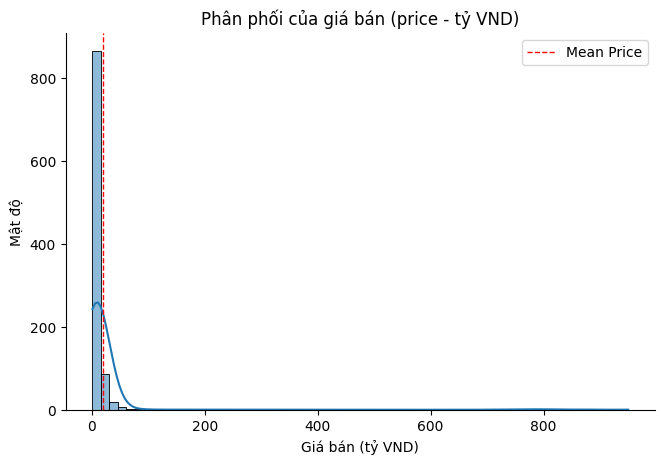

In [19]:
sns.displot(df['price'], kde=True, height=4.5, aspect=1.5)
plt.axvline(df['price'].mean(), color='red', linestyle='--', linewidth=1, label = "Mean Price")
plt.legend()
plt.title("Phân phối của giá bán (price - tỷ VND)")
plt.xlabel("Giá bán (tỷ VND)")
plt.ylabel("Mật độ")
plt.show()

Nhìn vào biểu đồ histogram cho ta thấy được hầu hết giá nhà đều tập trung vào khoảng bên trái (mean = 7.95 tỷ) nhưng các bất động sản siêu đắt ví dụ là 985 tỷ (outlier) -> Làm biểu đồ bị xấu và nhìn vào biểu đồ khó có thể rút ra được thông tin hữu ích. Từ đó ta sẽ sử dụng biến đổi logarit để nén các giá trị lớn lại gần nhau.

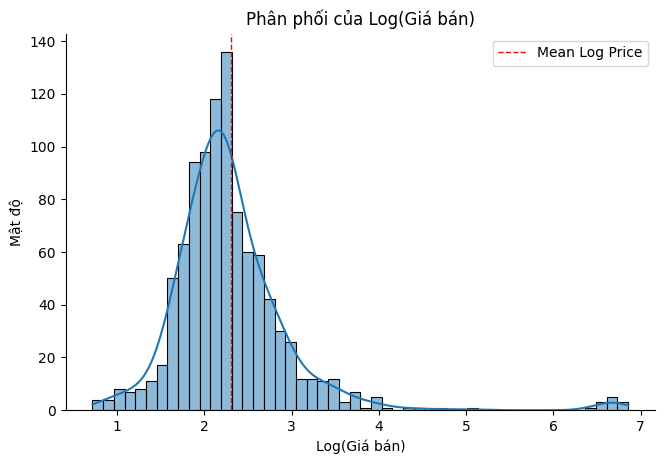

In [20]:
# Tạo cột mới là price_log
df['price_log'] = np.log1p(df['price'])
sns.displot(df["price_log"], kde = True, height=4.5, aspect=1.50)
plt.axvline(df['price_log'].mean(), color='red', linestyle='--', linewidth=1, label = "Mean Log Price")
plt.legend()
plt.title("Phân phối của Log(Giá bán)")
plt.xlabel("Log(Giá bán)")
plt.ylabel("Mật độ")
plt.show()

Với biểu đồ log price này thì chúng ta có thể nhìn rõ được cái phân phối về giá nhà nằm ở phân khúc nào và dễ thấy được có một số bất động sản có giá rất lớn. 

Biểu đồ phân phối của biến ``price`` được trực quan hóa bằng sns.displot() kèm đường ``KDE`` để thấy được xu hướng và mật độ phân tán của giá nhà. Đường thẳng đứng màu đỏ là ``giá trị trung bình`` được thêm bằng ``plt.axvline(...)`` để so sánh vị trí mean với toàn bộ phân phối.

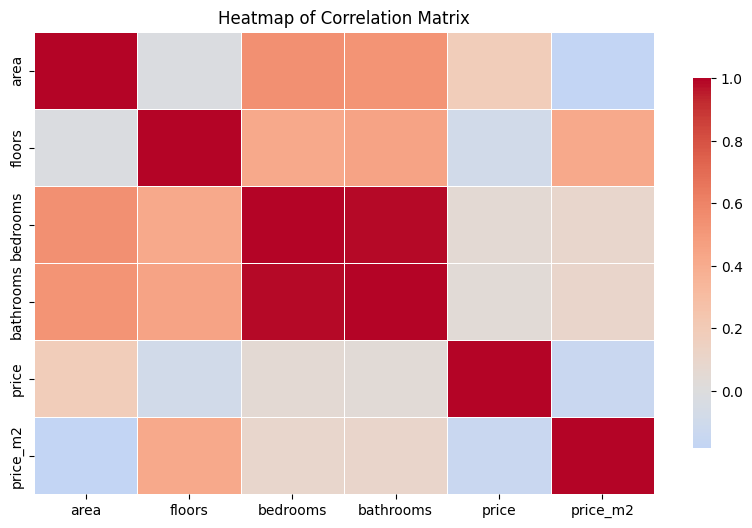

In [21]:
df.drop('price_log', axis=1, inplace=True)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), 
            cmap='coolwarm',
            linewidths=0.5,
            center = 0,
            cbar_kws={"shrink": 0.8})
plt.title("Heatmap of Correlation Matrix")
plt.show()

``Ma trận tương quan(heatmap)`` trực quan hóa mức độ tương quan giữa các thuộc tính số. Thang màu coolwarm: xanh là tương quan âm, đỏ là tương quan dương, trắng là center là quan hê yếu. Đường kẻ mảnh linewidths = 0.5 phân tách các ô. Heatmap giúp nhận diện đặc trưng có mối quan hệ chặt chẽ, hỗ trợ lựa chọn biến khi xây dựng mô hình.

Nhìn vào biểu đồ heatmap thì ta rút ra được một số nhận xét:
- Vì biểu đồ có các giá trị ngoại lai rất lớn nên cho ta thấy sự tương quan giữa price_m2 với price là tương quan âm.
- Đa cộng tuyến: Sự tương quan mạnh của 2 feature là bathrooms và bedrooms -> nếu sử dụng cả 2 feature này cùng trong mô hình thì sẽ kém ổn định. Từ đó, ta sẽ cân nhắc việc sử dụng 1 trong 2 feature này hoặc kết hợp chúng.
- Feature quan trọng: Biến area có tương quan mạnh với price -> ``feature quan trọng trong việc dự đoán giá nhà.``

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 1 to 1029
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   title        1029 non-null   object  
 1   address      1029 non-null   object  
 2   area         1029 non-null   float64 
 3   floors       864 non-null    float64 
 4   furniture    576 non-null    category
 5   bedrooms     840 non-null    float64 
 6   bathrooms    799 non-null    float64 
 7   price        990 non-null    float64 
 8   price_m2     990 non-null    float64 
 9   posted_date  1029 non-null   object  
 10  link         1029 non-null   object  
dtypes: category(1), float64(6), object(4)
memory usage: 90.8+ KB


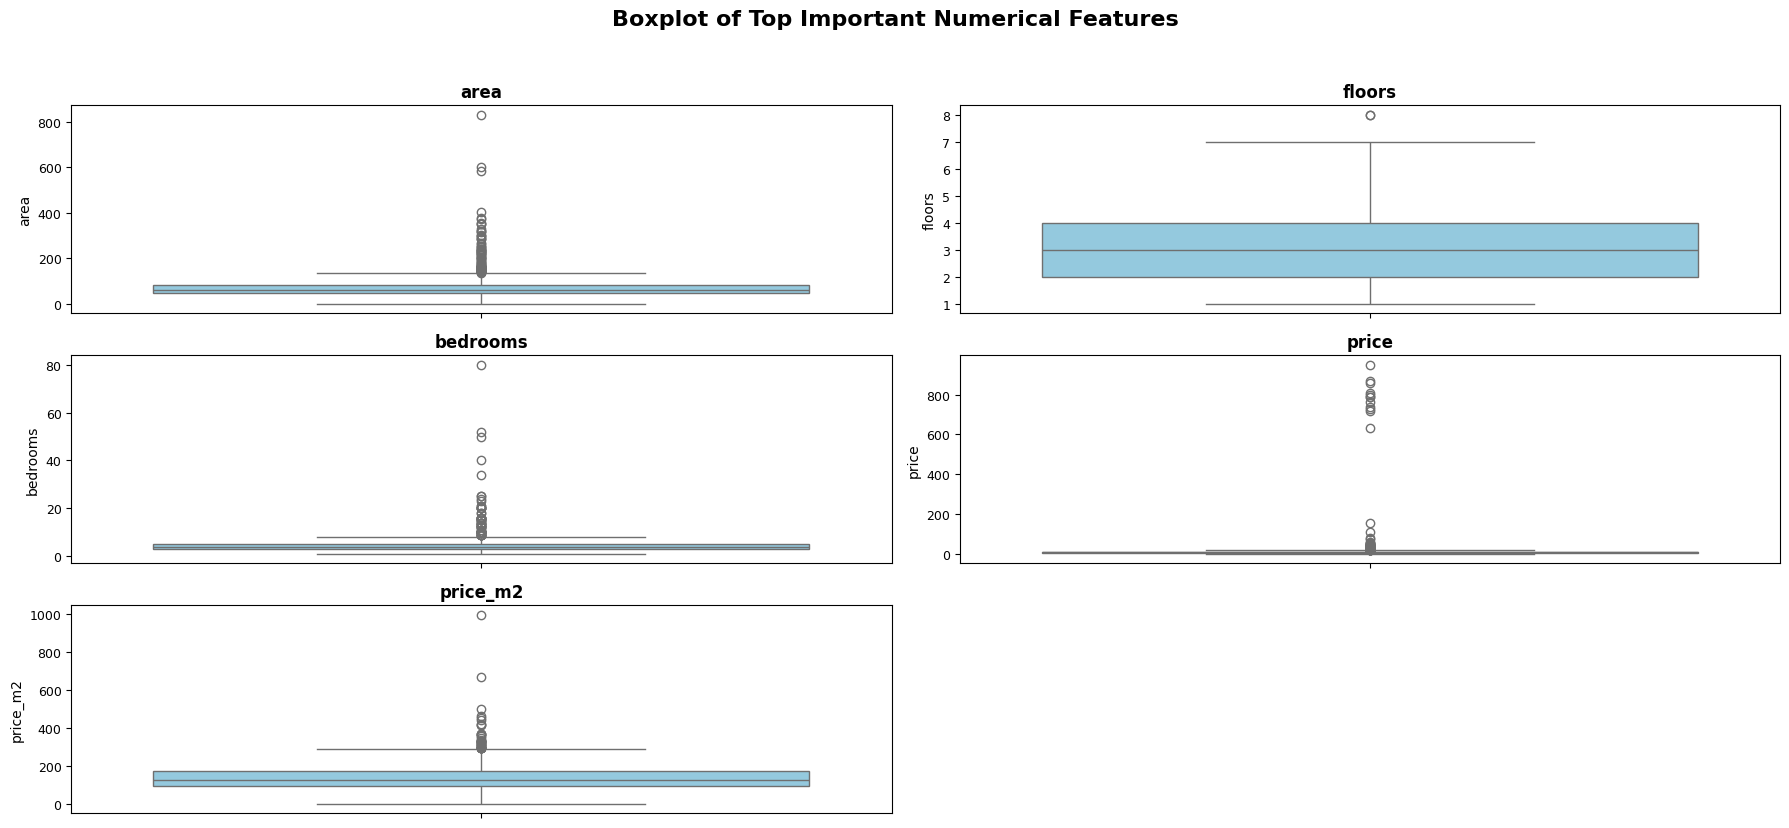

In [ ]:
boxplot_cols = ["area", "floors", "bedrooms", "price", "price_m2"]
fig, axes = plt.subplots(3, 2, figsize=(18,8))

axes = axes.flatten()
for i, col in enumerate(boxplot_cols):
    sns.boxplot(data = df, y =col, ax = axes[i], color='skyblue')
    axes[i].set_title(col, fontsize = 12, fontweight='bold')
    axes[i].tick_params(labelsize = 9)

for i in range(len(boxplot_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplot of Top Important Numerical Features", fontsize=16, fontweight="bold", y=1.03)
plt.tight_layout()
plt.show()

Trực quan hóa phân phối các đặc trưng quan trọng qua biểu đồ hộp (boxplot). Mỗi boxplot thể hiện phân phối một đặc trưng, cho phép quan sát các trung vị, các phần tử và phát hiện giá trị ngoại lệ. Màu skyblue thống nhất giúp dễ dàng so sánh. 
Biểu đồ này hữu ích để đánh giá sự phân tán và điểm bất thường của các đặc trưng có ảnh hưởng lớn, hỗ trợ phân tích và tiền xử lý trước khi xây dựng mô hình.

Nhìn vào biểu đồ boxplot trên chúng ta có thể nhìn ra vấn đề rất lớn ở đây là giá nhà đang được tính đơn vị là tỷ nhưng có những căn là trên 800 tỷ nên việc đó cho thấy được rất có khả năng là nhà đó là tính bằng đơn vị triệu nên chúng ta cần xem lại việc bóc tách dữ liệu ban đầu. Hoặc chúng ta có thể bỏ qua nhưng để xem số lượng có quá nhiều không. Bây giờ ta sẽ tính thử IOR để xem cột price còn lại bao nhiêu giá trị không phải outlier.

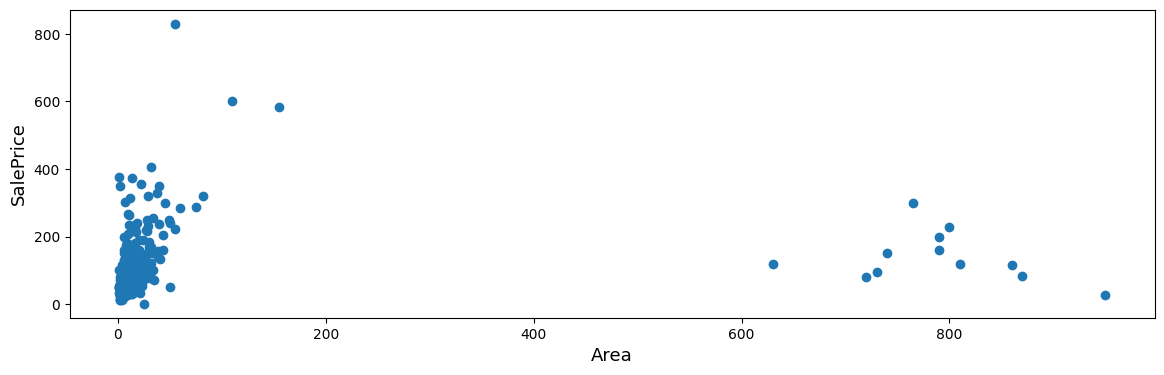

In [57]:
fig, ax = plt.subplots(figsize=(14,4))
ax.scatter(y = df['area'], x =df["price"])
plt.ylabel("SalePrice", fontsize = 13)
plt.xlabel('Area', fontsize = 13)
plt.show()

Nhìn vào mối quan hệ giữa giá và diện tích chúng ta có thể xử lý ngoại lệ dựa trên mối quan hệ này. Đầu tiên, biểu đồ phân tán được vẽ để trực quan hóa mối quan hệ giữa hai biến, giúp nhận diện điểm dữ liệu bất thường. 

Nhìn vào thì chúng ta có thể thấy được giá bị bất thường ở mức lớn hơn 600, và diện tích là trên 200. Trước mắt chúng ta sẽ xử lý dữ liệu dựa theo IQR trước.

In [52]:
col_name = 'price'
Q1 = df[col_name].quantile(0.25)
Q3 = df[col_name].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_filter = df[(df[col_name] >= lower_bound) & (df[col_name]<= upper_bound)].reset_index(drop=True)
print(lower_bound, upper_bound)
print(len(df_filter))
print(len(df["price"]))
print(df_filter["price"])


-2.9624999999999995 20.4975
910
1029
0       3.68
1       7.50
2      10.90
3      18.60
4      11.90
       ...  
905     8.00
906     5.35
907     1.15
908     1.55
909     3.45
Name: price, Length: 910, dtype: float64


Qua việc tính IQR thì ta có thể thấy dataset giảm đi khoảng 100 mẫu, tức là 1/10 nên ta có thể bỏ, thay vì chọn clean lại phần dữ liệu đó.
Ta sẽ vẽ lại biểu đồ boxplot để xem demo trước.

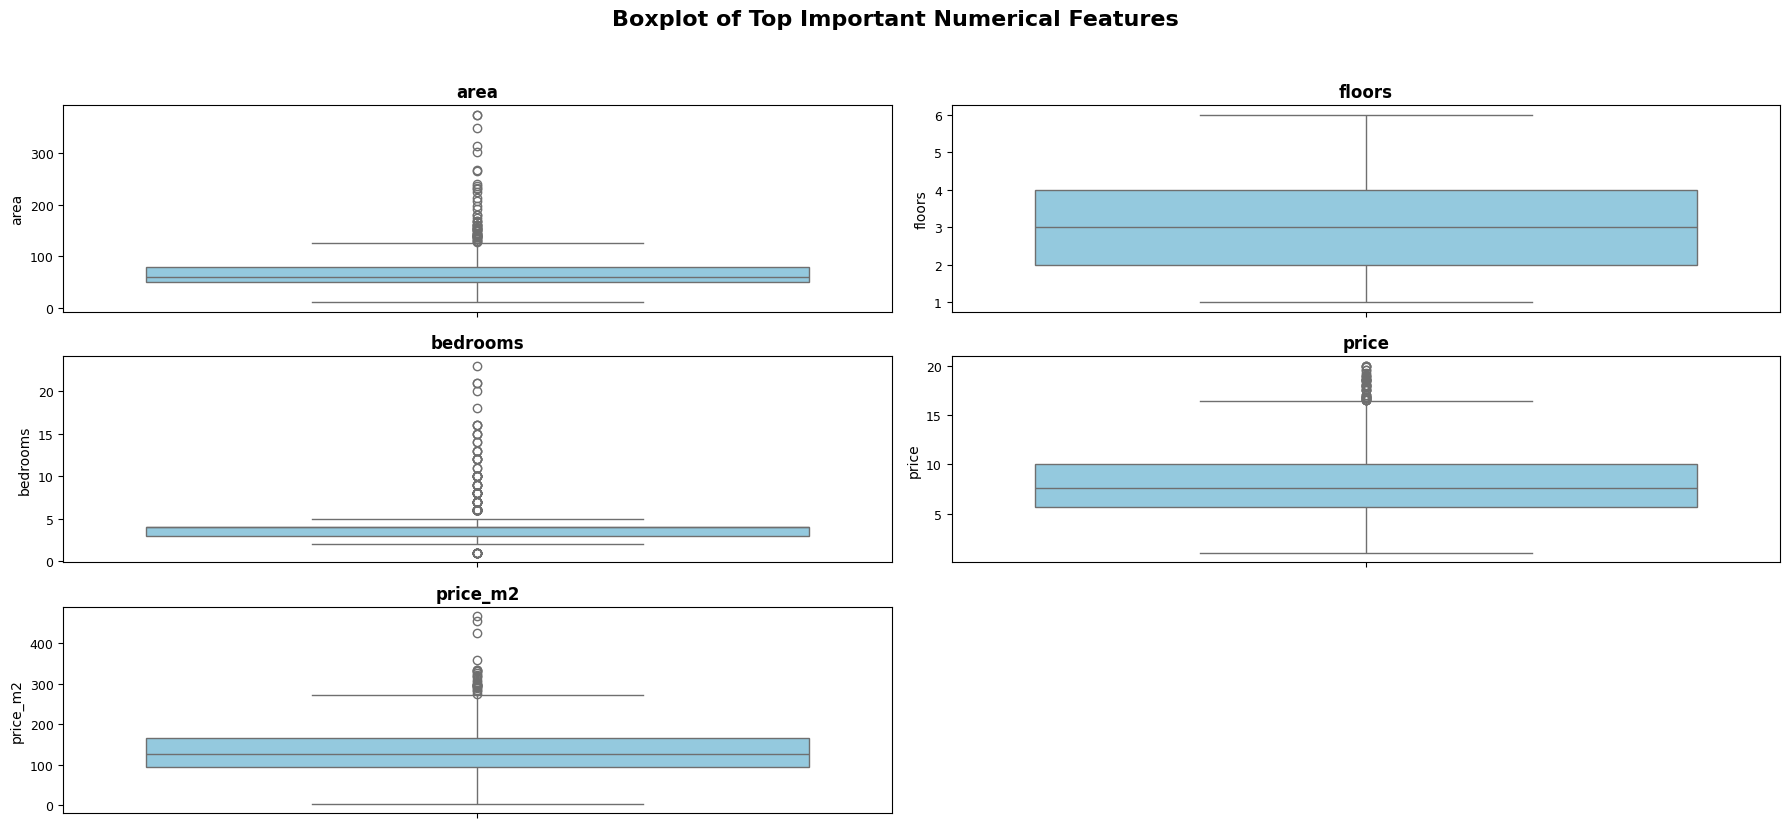

In [53]:
boxplot_cols = ["area", "floors", "bedrooms", "price", "price_m2"]
fig, axes = plt.subplots(3, 2, figsize=(18,8))

axes = axes.flatten()
for i, col in enumerate(boxplot_cols):
    sns.boxplot(data = df_filter, y =col, ax = axes[i], color='skyblue')
    axes[i].set_title(col, fontsize = 12, fontweight='bold')
    axes[i].tick_params(labelsize = 9)

for i in range(len(boxplot_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplot of Top Important Numerical Features", fontsize=16, fontweight="bold", y=1.03)
plt.tight_layout()
plt.show()

Có thể thấy được outlier đã giảm đi rất nhiều nhờ vào việc dùng IQR nhưng bây giờ tôi muốn xử lý thêm để dataset tốt nhất có thể.
Chúng ta sẽ xem lại biểu đồ scatter sau khi IQR để nhìn rõ hơn.

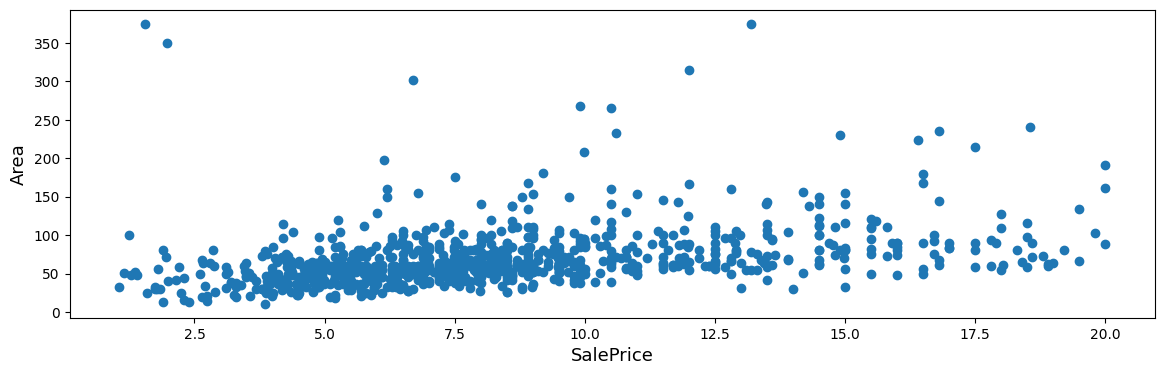

In [56]:
fig, ax = plt.subplots(figsize=(14,4))
ax.scatter(y = df_filter['area'], x =df_filter["price"])
plt.xlabel("SalePrice", fontsize = 13)
plt.ylabel('Area', fontsize = 13)
plt.show()

Chúng ta có thể thấy với những diện tích lớn hơn 200 thì đang bị outlier nên chúng ta sẽ loại bỏ nó.


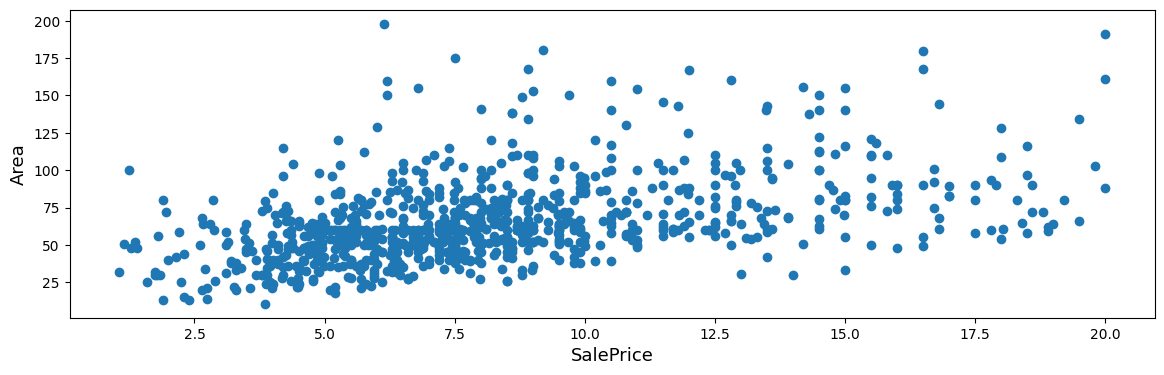

In [62]:
df_filter = df_filter[df_filter["area"] <= 200].reset_index()
fig, ax = plt.subplots(figsize=(14,4))
ax.scatter(y = df_filter['area'], x =df_filter["price"])
plt.xlabel("SalePrice", fontsize = 13)
plt.ylabel('Area', fontsize = 13)
plt.show()

Hiện tại thì chúng ta đã có được dataset khá là ổn rồi. Bây giờ chúng ta sẽ check lại dataset.

In [63]:

df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   index        896 non-null    int64   
 1   title        896 non-null    object  
 2   address      896 non-null    object  
 3   area         896 non-null    float64 
 4   floors       752 non-null    float64 
 5   furniture    505 non-null    category
 6   bedrooms     741 non-null    float64 
 7   bathrooms    704 non-null    float64 
 8   price        896 non-null    float64 
 9   price_m2     896 non-null    float64 
 10  posted_date  896 non-null    object  
 11  link         896 non-null    object  
dtypes: category(1), float64(6), int64(1), object(4)
memory usage: 79.4+ KB


Nhìn vào thông tin hiện tại thì chúng ta cần chú ý ở 3 cột đó là bedrooms và badrooms, floors là những cột quan trọng trong việc chọn feature nên chúng ta sẽ đi tiền xử lý các dữ liệu thiếu trong các cột này.
Chúng ta sẽ gán datafame gốc lại với datafame sau khi lọc.

In [64]:
df =df_filter